# Librerias

In [296]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

# SNR

$SNR_{dB} = 20 log_{10}(A_{señal}/A_{ruido}) = 10 log_{10}(P_{señal}/P_{ruido}) $

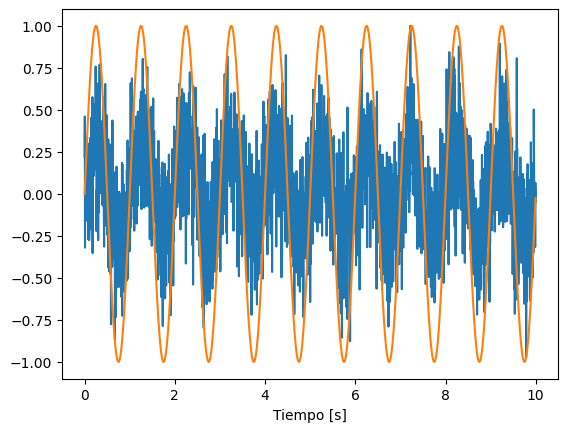

In [297]:
N = 10 # cantidad de segundos
fs = 250 # frecuencia de muestreo
f_in = 1 # frecuencia principal del senoide
SNR =  1 #dB la señal es 10 veces mas fuerte que el ruido

time = np.arange(0,N,1/fs) # Vector tiempo el salto esta marcado por la frecuencia de muestreo

noise = np.random.randn(N*fs) # Ruido blanco (valores aleatorios)

A_noise = np.sqrt(np.mean(noise**2)) #rwrt de la media del ruido
A_signal = A_noise * (10**(SNR/20))

x_signal = A_signal * np.sin(f_in * 2 * np.pi * time)
x_noise = x_signal + noise

x_signal = x_signal/max(x_signal)
x_noise = x_noise/max(x_noise)

plt.plot(time, x_noise)
plt.plot(time, x_signal)
plt.xlabel('Tiempo [s]')
plt.show()

In [298]:
def sin_noiseSNR(fs, f_in, N, SNR):
  """
  Función que genera una sinusoide y  su respectiva con
  ruido aleatorio agregado

  INPUTS:
  fs: frecuencia de muestreo de las señales a generar
  f_in: frecuencia principal de las sinusoides a generar
  N: tiempo total en segundos de la señal a generar
  SNR: relación señal-ruido

  OUTPUTS:
  x_noise: sinusoide con ruido añadido segun el SNR
  x_signal: sinusoide sin ruido
  time: vector tiempo que se corresponde con las anteriores señales
  """
  time = np.arange(0,N,1/fs) # Vector tiempo

  noise = np.random.randn(N*fs) # Ruido blanco (valores aleatorios)

  A_noise = np.sqrt(np.mean(noise**2))
  A_signal = A_noise * (10**(SNR/20))

  x_signal = A_signal * np.sin(f_in * 2 * np.pi * time)
  x_noise = x_signal + noise

  x_signal = x_signal/max(x_signal)
  x_noise = x_noise/max(x_noise)

  return x_noise, x_signal, time

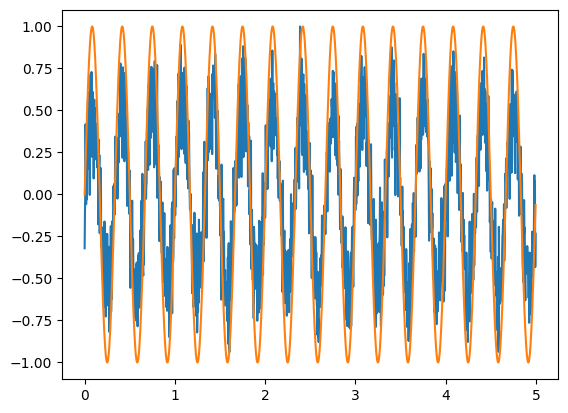

In [299]:
x_n, x_s, t = sin_noiseSNR(fs=300 , f_in=3 , N=5 , SNR=10 )

plt.plot(t,x_n)
plt.plot(t,x_s)
plt.show()

# CONDICIONAMIENTO

* Distribución de energías en una matriz

* Cercanía de la matriz a ser singular

* Relación entre valores singulares

Entonces decimos que una matriz está:


> MAL CONDICIONADA = Cociente entre máximo y mínimo valor singular > 1000


> BIEN CONDICIONADA = Cociente entre máximo y mínimo valor singular < 1000


**ECUACIÓN:**

$A.x = b$

y queremos encontrar el valor de $x$

In [300]:
A = np.array([[2,4,5],[6,9,8],[4,5,3]]) #matriz
b = np.array([[220],[490],[274]]) #vector solucion ec lineal

print(A,'\n')
print(b)

[[2 4 5]
 [6 9 8]
 [4 5 3]] 

[[220]
 [490]
 [274]]


Trato de hacer $x = {A}^{-1}. b$

In [301]:
A_inv = np.linalg.inv(A)

In [302]:
x = A_inv.dot(b)
print(x)

[[ 1.95155984e+16]
 [-2.10167983e+16]
 [ 9.00719925e+15]]


Veamos qué sucede si aplico un pequeño cambio a $A$ ($A'$)

In [303]:
A_prima = np.array([[2,4,5],[6,9.1,8],[4,5,3]])
print(A, '\n')
print(A_prima)

[[2 4 5]
 [6 9 8]
 [4 5 3]] 

[[2.  4.  5. ]
 [6.  9.1 8. ]
 [4.  5.  3. ]]


Trato de hacer $x' = A^{'-1}.b$

In [304]:
A_inv_prima = np.linalg.inv(A_prima)
x_prima = A_inv_prima.dot(b)
print(x_prima)

[[ 87.85714286]
 [-40.        ]
 [ 40.85714286]]


In [305]:
print(x)

[[ 1.95155984e+16]
 [-2.10167983e+16]
 [ 9.00719925e+15]]


Analicemos el determinante ...

In [306]:
det_A = np.linalg.det(A)
det_A

np.float64(-2.664535259100367e-15)

La matriz esta mal condicionada!!
Pequeños cambios cambian totalmente mis resultados

Necesitamos que este bien condicionada para obtener todos los coeficientes!!

Calculemos entonces el condicionamiento de la matriz. Tenemos 3 formas:

1. Directamente por librería mediante la función [np.linalg.cond()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html)

2. Descomponiendo en valores singulares mediante la función [np.linalg.svd()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) y calculando por fórmula ("cociente entre máximo y mínimo valor singular")

3. Aproximando por los autovalores ("cociente entre máximo y mínimo autovalor")

In [307]:
## Forma 1
cond_A = np.linalg.cond(A)
print(f'Condicionamiento calculado por NUMPY: {cond_A}\n')

## Forma 2
U, S, V = np.linalg.svd(A)
c1 = max(S)/min(np.abs(S)) # Valores singulares
print(f'Condicionamiento calculado a mano: {c1}\n')

## Forma 3
avals_A = np.linalg.eigvals(A)
print(f'Autovalores: {avals_A}\n')
c2 = max(avals_A)/min(np.abs(avals_A)) # autovalores
print(f'Aproximación de condicionamiento por autovalores: {c2}\n')

Condicionamiento calculado por NUMPY: 2.7213413533045784e+16

Condicionamiento calculado a mano: 2.7213413533045784e+16

Autovalores: [ 1.60553851e+01 -2.05538514e+00 -9.51274108e-16]

Aproximación de condicionamiento por autovalores: 1.6877769507668782e+16



---

# WIENER - HOPF

Recordando lo que vieron en la teoría:

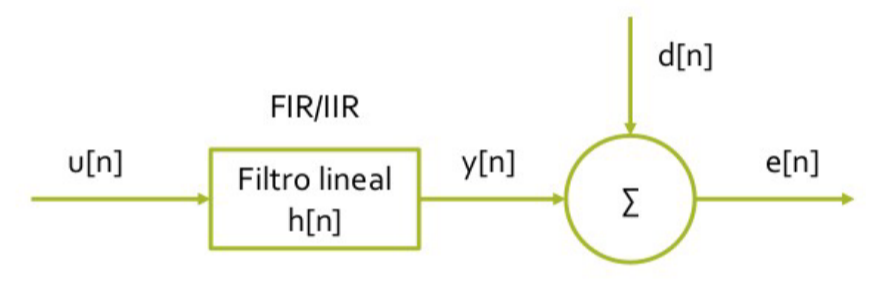

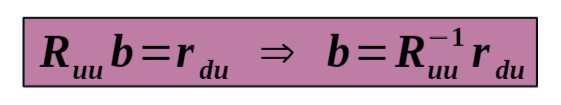

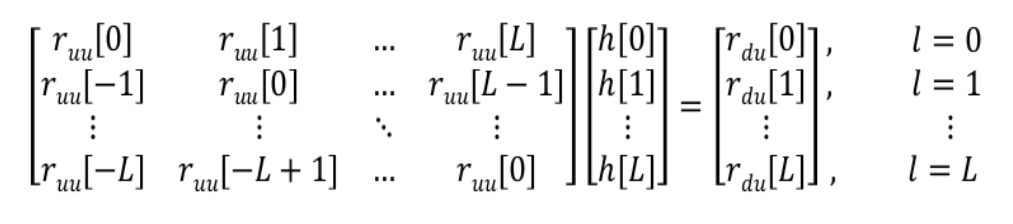

$R_{uu} .b = {r}_{du}$

$b = {R}_{uu}^{-1} . {r}_{du}$

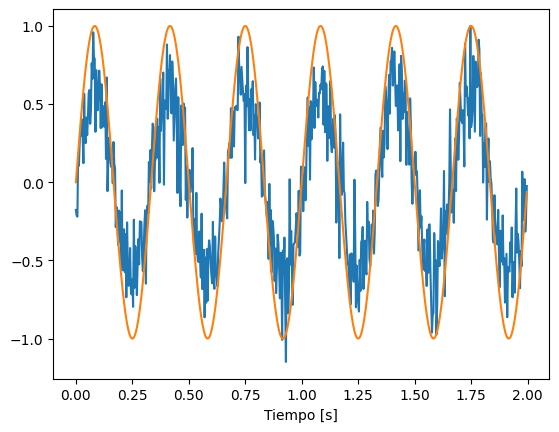

In [308]:
t_end = 2
fs = 500
SNR = 10

x_n, x_s, t = sin_noiseSNR(fs=300 , f_in=3 , N=t_end , SNR=10 )

plt.plot(t, x_n)
plt.plot(t,x_s)
plt.xlabel('Tiempo [s]')
plt.show()

[plt.xcorr()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xcorr.html)

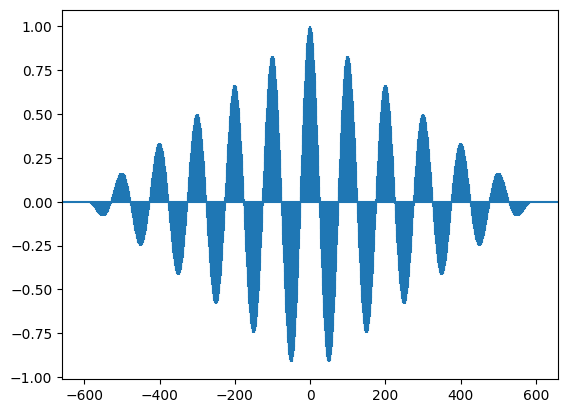

In [309]:
L = len(x_s)-1
lags, x_scor, _, _ = plt.xcorr(x_s,x_s,maxlags=L)
plt.show()

64

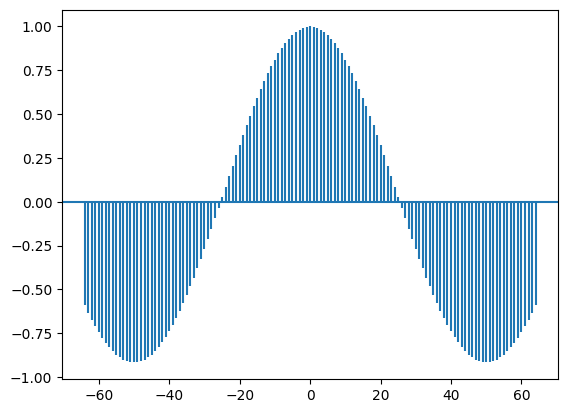

In [310]:
L = 2**6

ruu = plt.acorr(x_s, maxlags=L)[1]
ruu = ruu[L:-1]
len(ruu)

[[ 1.          0.99802673  0.99212784 ... -0.70906367 -0.67177614
  -0.6319807 ]
 [ 0.99802673  1.          0.99802673 ... -0.74368626 -0.70906367
  -0.67177614]
 [ 0.99212784  0.99802673  1.         ... -0.77549688 -0.74368626
  -0.70906367]
 ...
 [-0.70906367 -0.74368626 -0.77549688 ...  1.          0.99802673
   0.99212784]
 [-0.67177614 -0.70906367 -0.74368626 ...  0.99802673  1.
   0.99802673]
 [-0.6319807  -0.67177614 -0.70906367 ...  0.99212784  0.99802673
   1.        ]]


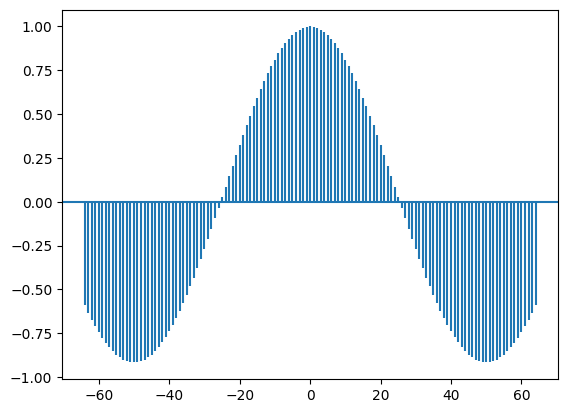

In [311]:
L = 2**6

ruu = plt.acorr(x_s, maxlags=L)[1]
ruu = ruu[L:-1]
#print(ruu)
Ruu = toeplitz(ruu)
print(Ruu)

64


64

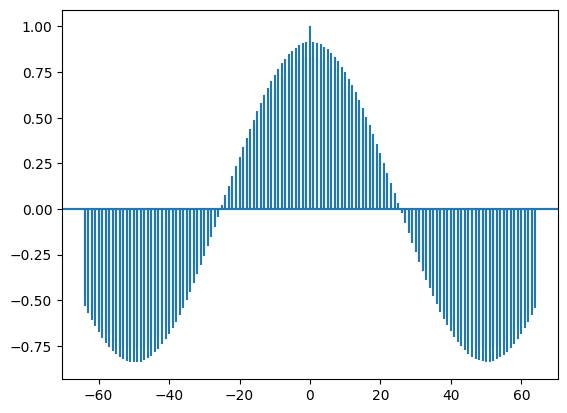

In [312]:
L = 2**6
x = x_n
d = x_s

ruu = plt.acorr(x, maxlags=L)[1]
ruu = ruu[L:-1]

Ruu = toeplitz(ruu)

# Chequear condicionamiento de R

Ruu_inv = scipy.linalg.inv(Ruu)

rdu = plt.xcorr(x, d, maxlags=L)[1]
rdu = rdu[L:-1]

b = Ruu_inv.dot(rdu)

print(L)
len(b)

In [313]:
def wiener_hopf(x, d, L):
  #x: entrada     d: deseada      L: cantidad de retrasos (orden del filtro)

  ruu = plt.acorr(x, maxlags=L)[1]
  ruu = ruu[L:-1]

  Ruu = toeplitz(ruu)

  # Chequear condicionamiento de R

  Ruu_inv = scipy.linalg.inv(Ruu)

  rdu = plt.xcorr(x, d, maxlags=L)[1]
  rdu = rdu[L:-1]

  b = Ruu_inv.dot(rdu)

  return b

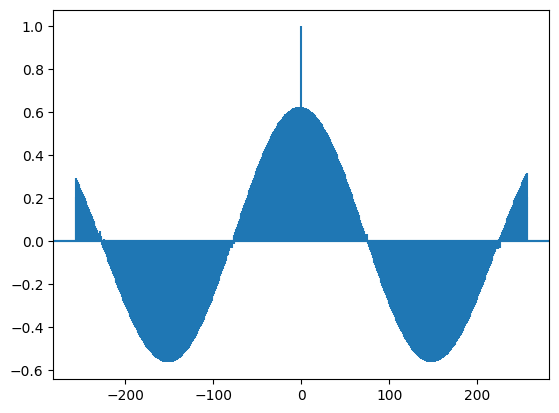

In [314]:
x_n, x_s, t = sin_noiseSNR(fs=300 , f_in=1 , N=5 , SNR=1)

b = wiener_hopf(x=x_n, d=x_s, L=2**8)

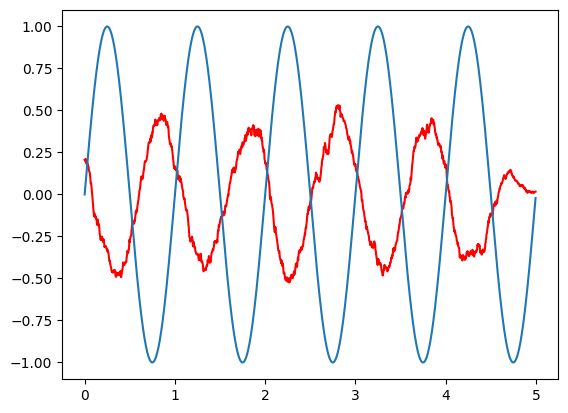

In [315]:
filtrada = np.convolve(b,x_n,mode='same')

plt.plot(t,filtrada,'r')
plt.plot(t,x_s)
plt.show()

Filtro backward foward --> sacca el delay

[scipy.signal.lfilter()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)

[scipy.signal.filtfilt()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html)

In [316]:
filtrada_lfilter = scipy.signal.lfilter(b, 1, x_n)
filtrada_filtfilt = scipy.signal.filtfilt(b, 1, x_n)

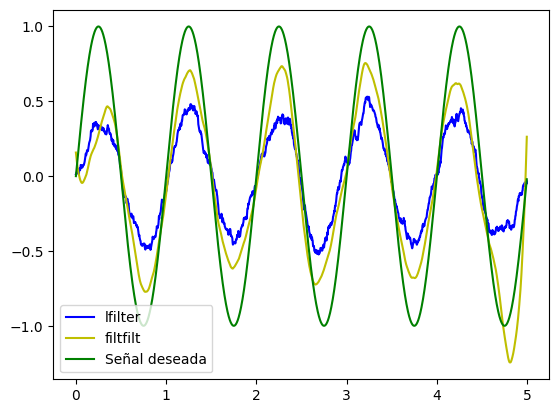

In [317]:
plt.plot(t,filtrada_lfilter, 'b', label='lfilter')
plt.plot(t,filtrada_filtfilt, 'y', label = 'filtfilt')
plt.plot(t,x_s, 'g', label = 'Señal deseada')
plt.legend()
plt.show()

Los filtros adaptativos se van acomodando

## WIENER ADAPTATIVO

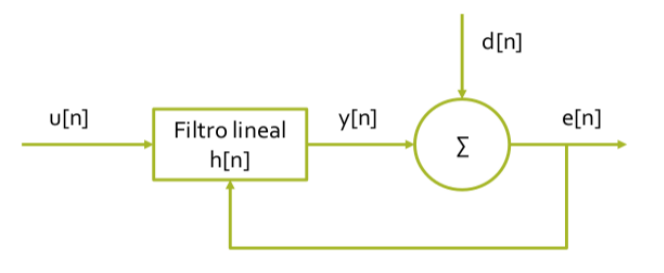

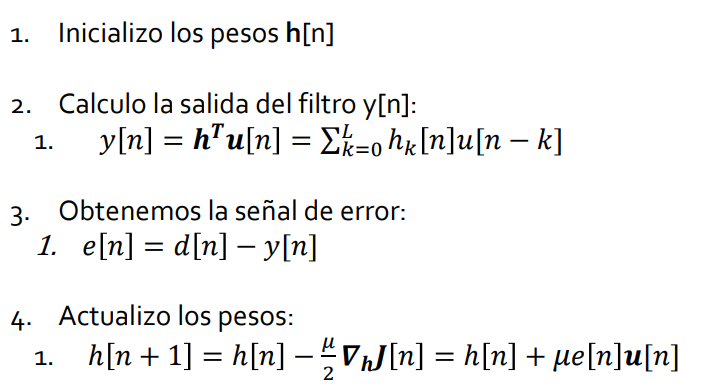

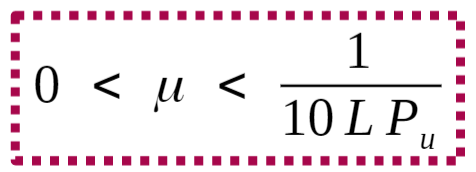

L = Orden de Filtro

Pu = Potencia de funcion de entrada

In [318]:
x_n, x_s, t = sin_noiseSNR(fs=300 , f_in=1 , N=5 , SNR=1)

x = x_n
d = x_s
#mu =
L = 2**8

a =0.7
Px = np.mean(x**2)
mu = a*(1/(10*L*Px))

(1, 256)
(256,)


C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\2850771148.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0,i] = h.dot(x1) # 2. Calculo la salida del filtro


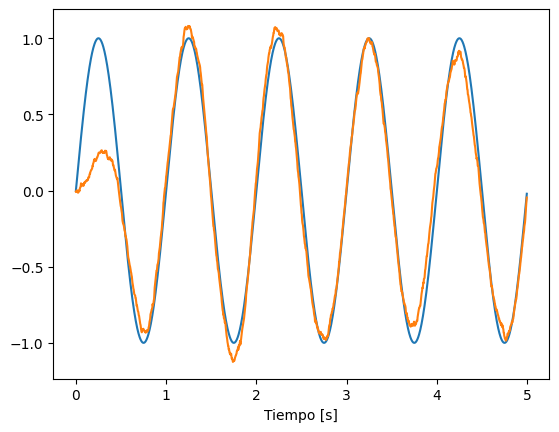

In [319]:
# 0. Chequear que mu sea un valor válido

M = x.shape[0]

# 1. Inicializo los pesos (y el resto de valores)
h = np.zeros([1,L]) # Vector pesos
y = np.zeros([1,M])
e = np.zeros([1,M])

for i in range(L,M):
  x1 = x[i:i-L:-1]

  y[0,i] = h.dot(x1) # 2. Calculo la salida del filtro

  e[0,i] = d[i] - y[0,i] # 3. Obtengo la señal de error

  h = h + mu *e[0,i] * x1 # 4. Actualizo los pesos

print(h.shape)
h = h[0]
print(h.shape)


filtrada = scipy.signal.lfilter(h, 1, x_n)

plt.plot(t, x_s)
plt.plot(t,filtrada)
plt.xlabel('Tiempo [s]')
plt.show()

In [320]:
def lms(x, d, L, mu):

  """
  x: señal de entrada
  d: señal deseada
  L: orden del filtro
  mu: paso para la actualización
  """

  # 0. Chequear que mu sea un valor válido

  # 1. Inicializo los pesos (y el resto de valores)
  M = x.shape[0]
  h = np.zeros([1,L]) # Vector pesos
  y = np.zeros([1,M])
  e = np.zeros([1,M])

  for i in range(L,M):
    x1 = x[i:i-L:-1]

    y[0,i] = h.dot(x1) # 2. Calculo la salida del filtro

    e[0,i] = d[i] - y[0,i] # 3. Obtengo la señal de error

    h = h + mu *e[0,i] * x1 # 4. Actualizo los pesos

  h = h[0]

  return h

C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\1979406895.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0,i] = h.dot(x1) # 2. Calculo la salida del filtro


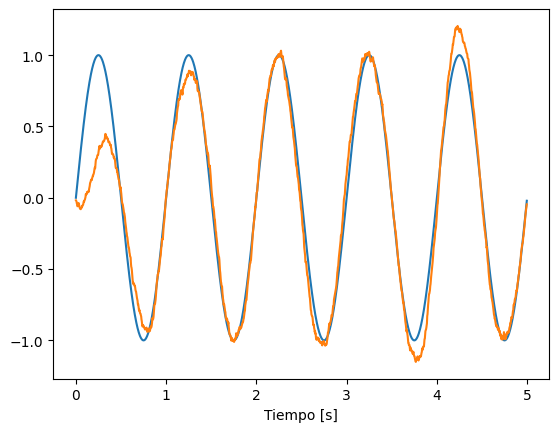

In [321]:
x_n, x_s, t = sin_noiseSNR(fs=300 , f_in=1 , N=5 , SNR=1)

x = x_n
d = x_s
L = 2**8

a = 0.9
Px = np.mean(x**2)
mu = a*(1/(10*L*Px))

h = lms(x, d, L, mu)

filtrada = scipy.signal.lfilter(h, 1, x)

plt.plot(t, x_s)
plt.plot(t,filtrada)
plt.xlabel('Tiempo [s]')
plt.show()

**<font color="yellow"> ¿Qué hace a en el código de lms? <font>**

C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\1979406895.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0,i] = h.dot(x1) # 2. Calculo la salida del filtro


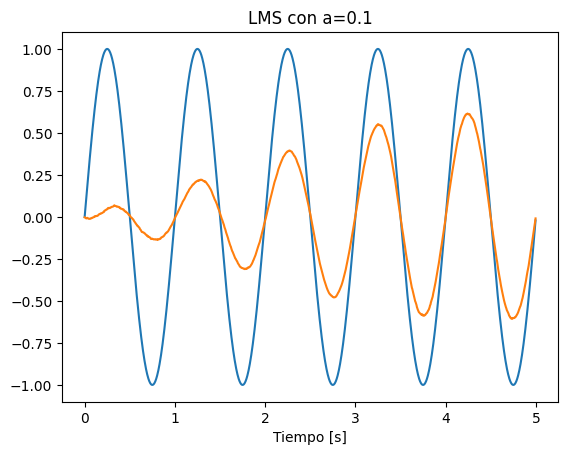

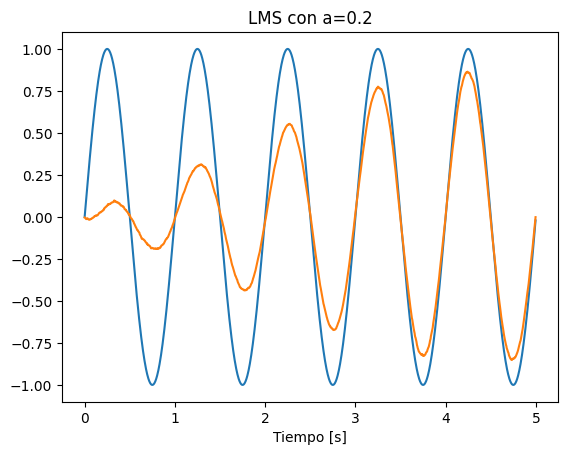

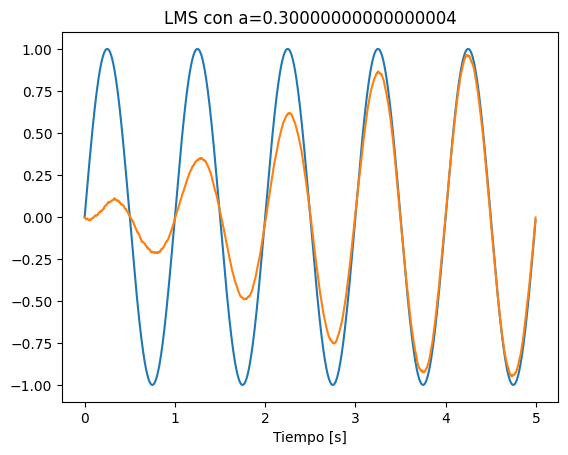

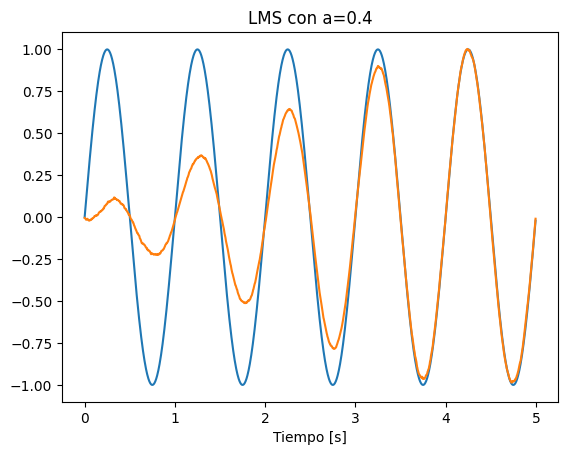

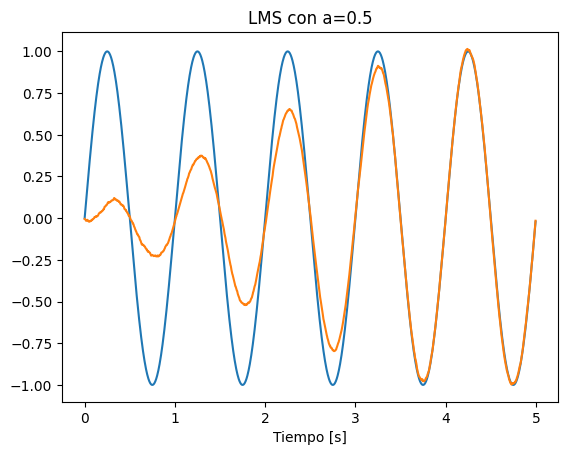

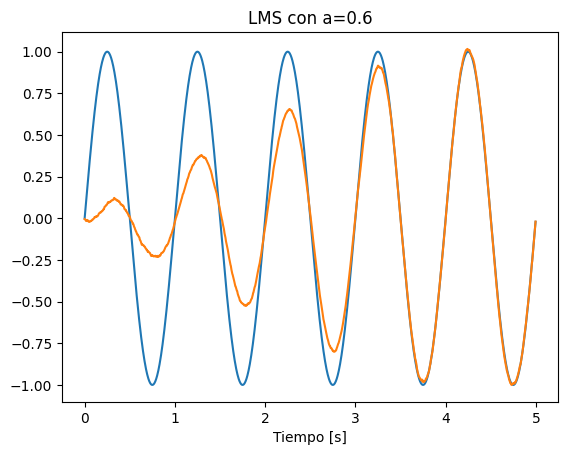

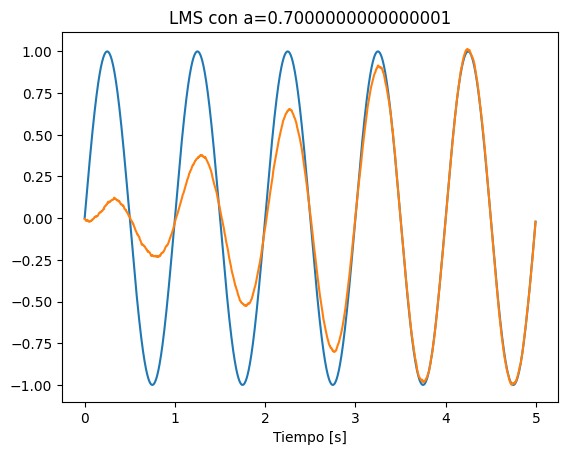

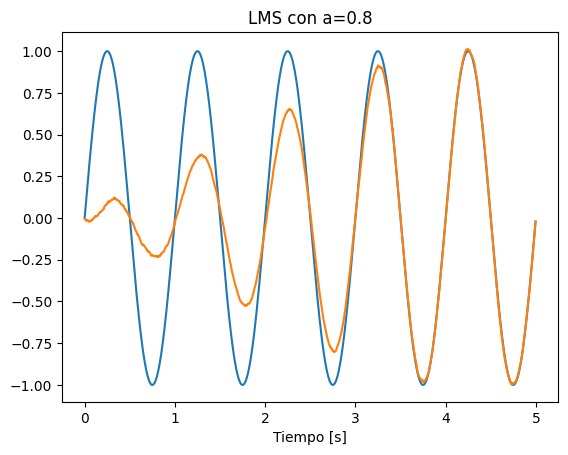

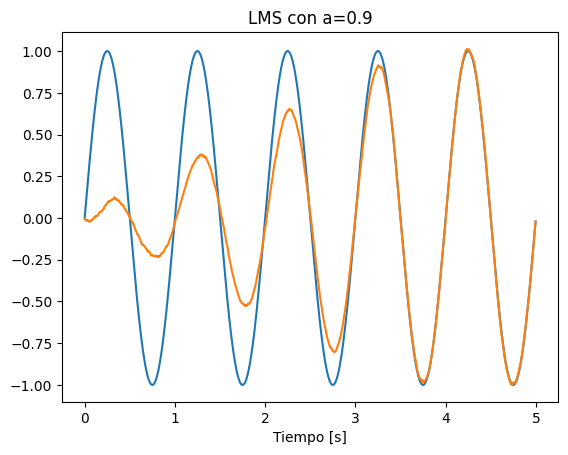

In [322]:
L = 2**10
for a in np.linspace(0.1,0.9,9):
  Px = np.mean(x**2)
  mu = a*(1/(10*L*Px))

  h = lms(x, d, L, mu)

  filtrada = scipy.signal.lfilter(h, 1, x)
  print()
  plt.plot(t, x_s)
  plt.plot(t,filtrada)
  plt.xlabel('Tiempo [s]')
  plt.title(f'LMS con a={a}')
  plt.show()

**<font color="yellow"> ¿Qué hace L en el código de lms? <font>**

C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\1979406895.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0,i] = h.dot(x1) # 2. Calculo la salida del filtro


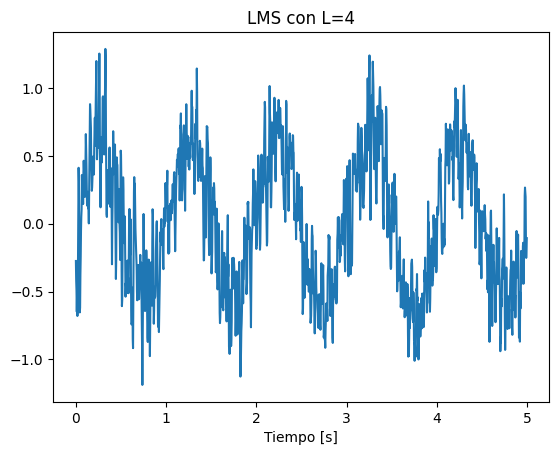

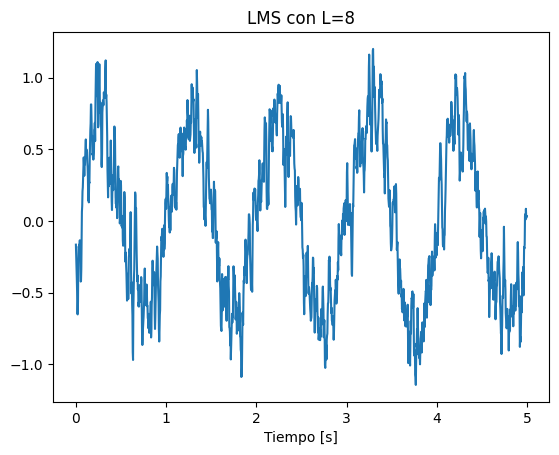

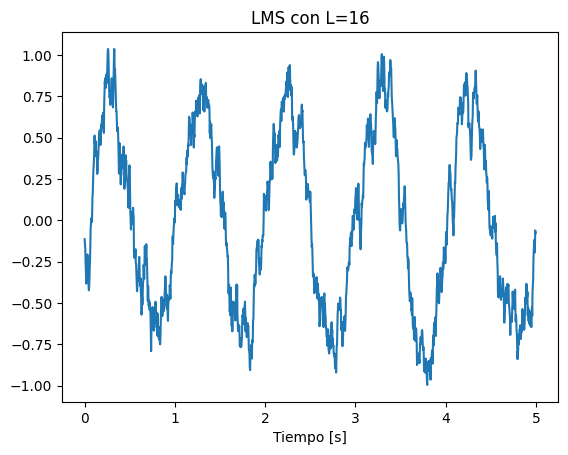

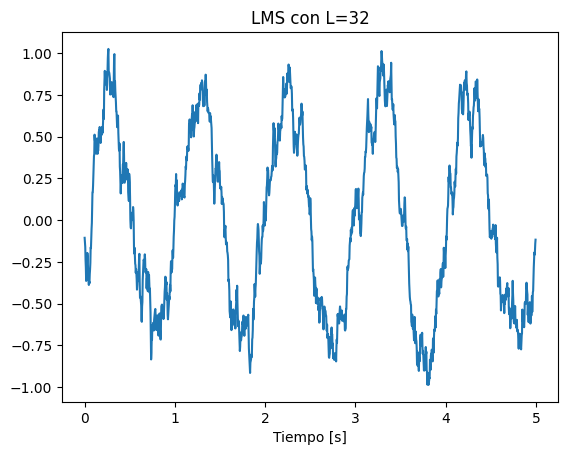

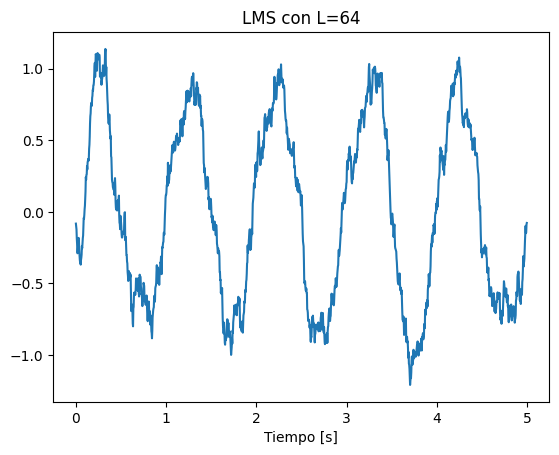

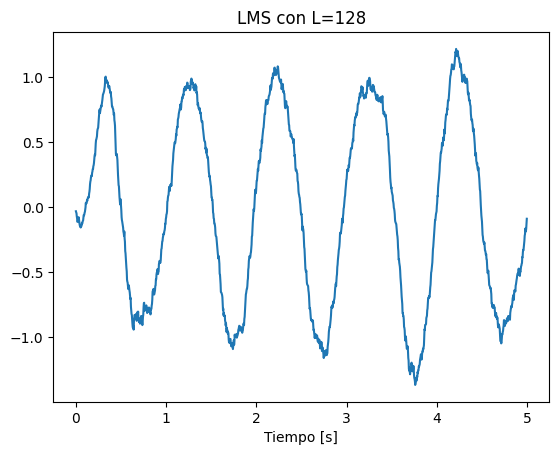

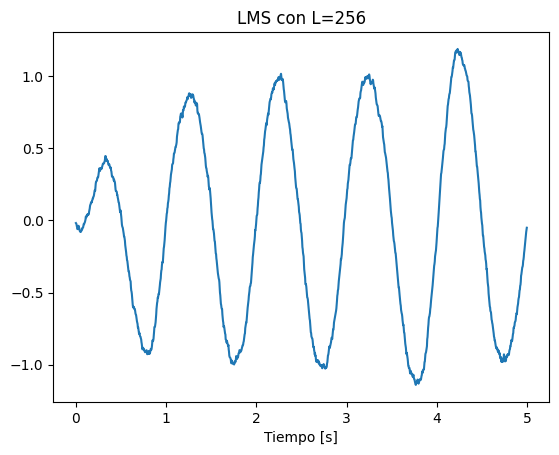

In [323]:
a = 0.7
for i in [2,3,4,5,6,7,8]:
  L = 2**i
  Px = np.mean(x**2)
  mu = a*(1/(10*L*Px))

  h = lms(x, d, L, mu)

  filtrada = scipy.signal.lfilter(h, 1, x)
  print()
  #plt.plot(t, x_s)
  plt.plot(t,filtrada)
  plt.xlabel('Tiempo [s]')
  plt.title(f'LMS con L={2**i}')
  plt.show()

Diferencias claves entre filtros Wiener-Hopf y filtros adaptativos

-Requerimientos de Conocimiento Previsto:

**Wiener-Hopf:** Necesita estadísticas de señal y ruido conocidas de antemano.

**Adaptativo:** No necesita conocimiento previo; se adapta en tiempo real.

-Adaptabilidad:

**Wiener-Hopf:** coeficientes son fijos.

**Adaptativo:** coeficientes cambian en tiempo real.

-Aplicación:

**Wiener-Hopf:** Ideal para entornos estacionarios donde las estadísticas no cambian.

**Adaptativo:** Ideal para entornos no estacionarios donde las estadísticas cambian con el tiempo.

-Complejidad Computacional:

**Wiener-Hopf:** Computacionalmente intensivo inicialmente debido a la necesidad de invertir matrices.

**Adaptativo:** Menos costoso computacionalmente inicialmente, pero requiere actualizaciones continuas.

### Aplicación con EEG-EOG

[Señales a utilizar](https://drive.google.com/drive/folders/1r30ka9_SPqBlqioxU6w9VTjWvcddnssH?usp=sharing)

**AVISO:** NO CAMBIAR LOS NOMBRES DE LOS ARCHIVOS


In [324]:
import mne

In [325]:
path = 'C:/Users/Juan Bautista/.vscode/PSIB/Filtros Optimos y AR/ExpS11/ExpS11.vhdr'

raw = mne.io.read_raw_brainvision(path, preload=True, eog=('EOG1_1','EOG2_1'), misc=('EMG1_1','EMG2_1'), verbose=True)

Extracting parameters from C:/Users/Juan Bautista/.vscode/PSIB/Filtros Optimos y AR/ExpS11/ExpS11.vhdr...
Setting channel info structure...
Reading 0 ... 663803  =      0.000 ...  3319.015 secs...


C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\1365143837.py:3: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(path, preload=True, eog=('EOG1_1','EOG2_1'), misc=('EMG1_1','EMG2_1'), verbose=True)
C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\1365143837.py:3: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.03 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(path, preload=True, eog=('EOG1_1','EOG2_1'), misc=('EMG1_1','EMG2_1'), verbose=True)
C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\1365143837.py:3: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (90.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(path, preload=True, eog=('EOG1_1','EOG2_1'), misc=('EMG1_1','EMG2_1'), verbose=True)


In [326]:
raw

<RawBrainVision | ExpS11.eeg, 10 x 663804 (3319.0 s), ~50.7 MB, data loaded>

In [327]:
info = raw.info
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: C3_1, C4_1, F3_1, F4_1, P3_1, P4_1, EOG1_1, EOG2_1, EMG1_1, EMG2_1
 chs: 6 EEG, 2 EOG, 2 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 90.0 Hz
 meas_date: 2013-04-18 00:04:04 UTC
 nchan: 10
 projs: []
 sfreq: 200.0 Hz
>


In [328]:
info.get('ch_names')

['C3_1',
 'C4_1',
 'F3_1',
 'F4_1',
 'P3_1',
 'P4_1',
 'EOG1_1',
 'EOG2_1',
 'EMG1_1',
 'EMG2_1']

In [329]:
fs = info.get('sfreq')
print(fs,'Hz')

200.0 Hz


In [330]:
data = raw.get_data()
data

array([[ 2.370e-05,  2.130e-05,  2.170e-05, ...,  2.000e-07, -5.300e-06,
         5.300e-06],
       [ 3.010e-05,  2.610e-05,  1.700e-05, ..., -2.930e-05, -3.320e-05,
        -2.440e-05],
       [ 1.034e-04,  1.015e-04,  1.009e-04, ..., -1.200e-06, -1.020e-05,
        -1.400e-06],
       ...,
       [ 1.515e-04,  1.548e-04,  1.546e-04, ..., -5.128e-04, -5.300e-04,
        -5.227e-04],
       [-1.390e-05, -1.500e-05, -1.410e-05, ..., -7.250e-05,  3.000e-06,
         6.310e-05],
       [-1.290e-05, -1.780e-05, -1.380e-05, ..., -7.910e-05,  2.600e-06,
         6.910e-05]])

In [331]:
C3, C4, F3, F4, P3, P4, EOG1, EOG2, EMG1, EMG2 = data[0], data[1], data[2], data[3], data[4], data[5], data[6], data[7], data[8], data[9]

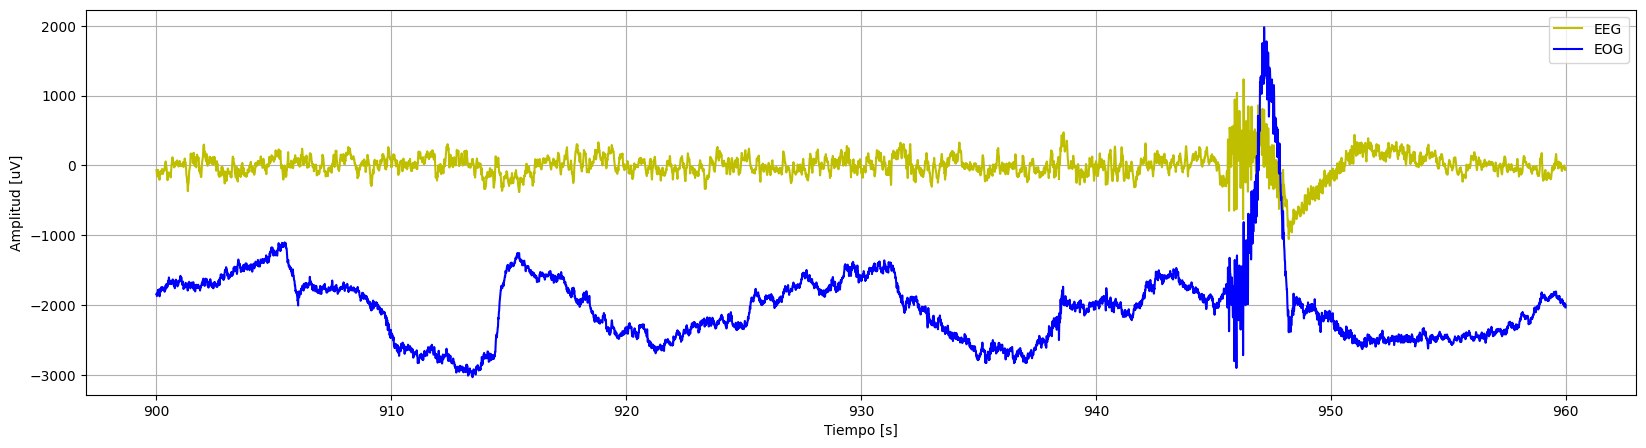

In [332]:
epoch0 = 30
epoch1 = epoch0+2
t0 = 30*epoch0
t1 = 30*epoch1

t_0 = int(t0*fs)
t_1 = int(t1*fs)

EEG_cut = C4[t_0:t_1]*10e6
EOG_cut = EOG1[t_0:t_1]*10e6
t = np.linspace(t0, t1,EEG_cut.shape[0])

plt.figure(figsize=(20,5))
plt.plot(t,EEG_cut,'y',label='EEG')
plt.plot(t,EOG_cut-2000,'b',label='EOG')
plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [s]')
plt.legend()
plt.grid()
plt.show()

C:\Users\Juan Bautista\AppData\Local\Temp\ipykernel_21336\1979406895.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0,i] = h.dot(x1) # 2. Calculo la salida del filtro


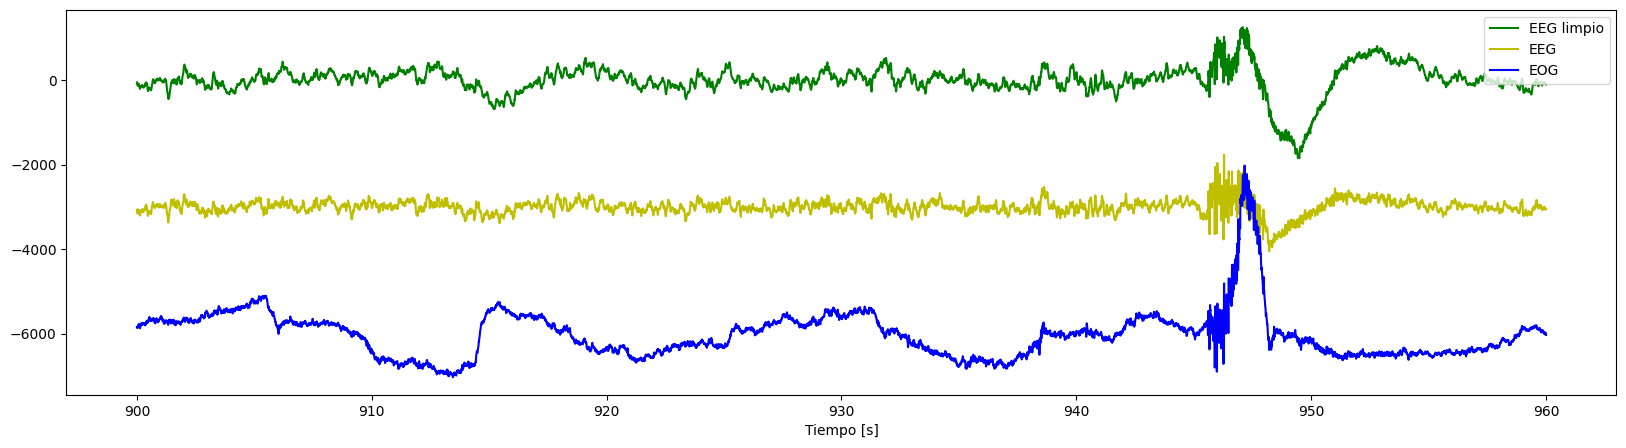

In [333]:
x = EEG_cut
d = EOG_cut

L = 2**8

a = 0.9
Px = np.mean(x**2)
mu = a*(1/(10*L*Px))

h = lms(x, d, L, mu)

filtrada = scipy.signal.lfilter(h, 1, x)

plt.figure(figsize=(20,5))
plt.plot(t,EEG_cut - filtrada,'g',label="EEG limpio")
plt.plot(t, EEG_cut-3000,'y', label="EEG")
plt.plot(t,EOG_cut-6000,'b',label="EOG")
plt.xlabel('Tiempo [s]')
plt.legend()
plt.show()

# MODELO AR

## YULE-WALKER

Las ecuaciones de Yule-Walker son un conjunto de ecuaciones que relacionan los coeficientes de un modelo autorregresivo (AR) con la autocorrelación de una señal. Estas ecuaciones proporcionan un método para calcular los coeficientes del modelo AR directamente a partir de la autocorrelación de la señal.

Las ecuaciones de Yule-Walker pueden ser expresadas matemáticamente de la siguiente manera:

Dado un modelo autorregresivo (AR) de orden pp:

$x(n)=a_1x(n−1)+a_2x(n−2)+…+a_px(n−p)+e(n)$

Donde:

$x(n)$ es la señal de entrada.

$a_1,a_2​,…,a_p$​ son los coeficientes del modelo AR que deseamos calcular.

$e(n)$ es un término de error.

si la señal autocorrelaciona consigo misma aparecen patrones

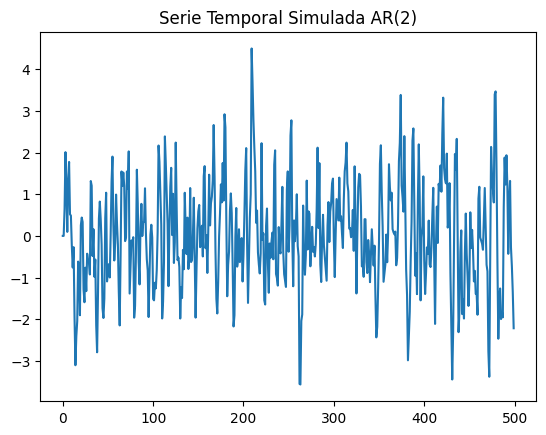

In [334]:
# Configuración de los parámetros
np.random.seed(42)
n = 500  # número de puntos de datos
a_v = [0.75, -0.25]  # Coeficientes verdaderos de AR(2)
#le doy un valor semilla y veo el error que cometi
U = np.zeros(n)
err = np.random.normal(0, 1, n)  # Ruido blanco

# Generar la serie temporal AR(2)
for t in range(2, n):
    U[t] = a_v[0] * U[t-1] + a_v[1] * U[t-2] + err[t]

# Graficar la serie temporal
plt.plot(U)
plt.title("Serie Temporal Simulada AR(2)")
plt.show()

In [335]:
def autocorrelacion(series, lag):
    n = len(series)

    # Numerador: Producto de la serie con su retardo
    numerador = np.sum(series[:n-lag] * series[lag:])

    # Denominador: Suma de los cuadrados de la serie (sin retardo)
    denominador = np.sum(series ** 2)

    # Autocorrelación es el numerador dividido por el denominador
    return numerador / denominador

# Calcular la autocorrelación para los lags hasta p
l = 2  # Orden del modelo
ac_valores = [autocorrelacion(U, lag) for lag in range(l + 1)]

print("Autocorrelaciones:", ac_valores)


Autocorrelaciones: [np.float64(1.0), np.float64(0.5913440268224395), np.float64(0.18057310149504532)]


In [336]:
def autocorrelacion_p(series, lag):
    """Calcula la autocorrelación de una serie temporal para un lag dado sin calcular la autocovarianza."""
    n = len(series)
    m = np.mean(series)

    # Numerador: Producto de las desviaciones con un lag
    numerador = np.sum((series[lag:] - m) * (series[:n-lag] - m))

    # Denominador: Suma de las desviaciones al cuadrado (varianza)
    denominador = np.sum((series - m) ** 2)

    # Autocorrelación es el numerador dividido por el denominador
    return numerador / denominador

# Calcular la ACF para los lags hasta p
p = 2  # Orden del modelo AR
ac_valores = [autocorrelacion_p(U, lag) for lag in range(p + 1)]

print("Autocorrelaciones (ACF):", ac_valores)


Autocorrelaciones (ACF): [np.float64(1.0), np.float64(0.591240725709264), np.float64(0.1803828377481739)]


In [337]:
# Matriz de autocorrelaciones (Toeplitz)
R = np.array([[ac_valores[0], ac_valores[1]],
              [ac_valores[1], ac_valores[0]]])

# Vector de autocorrelaciones
r = np.array([ac_valores[1], ac_valores[2]])

print("Matriz de autocorrelaciones (R):")
print(R)
print("Vector de autocorrelaciones (r):")
print(r)

Matriz de autocorrelaciones (R):
[[1.         0.59124073]
 [0.59124073 1.        ]]
Vector de autocorrelaciones (r):
[0.59124073 0.18038284]


In [338]:
# Resolver las ecuaciones de Yule-Walker
phi_estimated = np.linalg.solve(R, r)

print("Coeficientes AR estimados:", phi_estimated)

# Coeficientes verdaderos
print("Coeficientes AR verdaderos:", a_v)

# Estimación de la varianza del error
sigma_squared = ac_valores[0] - np.dot(phi_estimated, ac_valores[1:p+1])
print("Varianza del error estimada:", sigma_squared)

Coeficientes AR estimados: [ 0.74502677 -0.26010733]
Coeficientes AR verdaderos: [0.75, -0.25]
Varianza del error estimada: 0.6064287283434395


### Alternativa

In [339]:
def yule_walker(x,L):
  # Armo la matriz R
  rxx = plt.acorr(x, maxlags = L)[1]
  rxx = rxx[L:]
  Rxx = toeplitz(rxx[:-1]) #Rxx es la matriz


  # Encuentro coef (son los coeficientes, los pesos)
  coef = - (np.linalg.solve(Rxx,rxx[1:])) # Resolver Rxx*a=rxx, rxx es una matriz de (L+1x1)
  coef = np.insert(coef,0,1) #Inserto el 1 en el vector a en la posición 0

  return coef   # esta funcion me devuelve los coef

## LEVINSON-DURBIN

1-Inicialización:
  Comenzamos con un modelo AR de orden cero, donde el único coeficiente $a_0$ es la media de la señal $x(n)$.
  Calculamos el error de predicción para este modelo de orden cero, que se define como:
  $E(0)=∑_{n=0}^{N−1}[x(n)−a_0]2$


2-Iteración:
  En cada paso de la iteración, agregamos un nuevo coeficiente al modelo AR. Dado el modelo AR actual de orden m, donde $m < p_m < p$, queremos encontrar el coeficiente $a_{m+1}$​ que minimiza el error de predicción.Utilizamos la fórmula de recursión de Levinson-Durbin para calcular $a_{m+1}​$ en términos de los coeficientes anteriores $a_1,a_2,… a_m$​.


3-Recursión de Levinson-Durbin:
  La fórmula de recursión de Levinson-Durbin para calcular el nuevo coeficiente $a_{m+1}$​ es:
  
  $a_{m+1}=−r_m/E(m)​​$​
  
  donde $r_m$​ es el m-ésimo coeficiente de autocorrelación de la señal y $E(m)$ es el error de predicción del modelo de orden $m$.
  Esta fórmula se calcula de manera recursiva utilizando los coeficientes anteriores y las autocorrelaciones.

4-Finalización:
  Repetimos el proceso de iteración hasta obtener todos los coeficientes del modelo AR de orden pp.
  Al final, habremos calculado pp coeficientes $a_1,a_2,…,a_p$​ que mejor representan la señal $x(n)$ según el criterio de mínimos cuadrados.

### Alternativa 1

In [346]:
def levinson_durbin(x, L):
#Calcula los coeficientes de un modelo AR utilizando el algoritmo de Levinson-Durbin. Devuelve los coeficientes del modelo AR y la potencia del error asociada
  R = [x.dot(x)]
  # Calculo la autocorrelación
  for i in range(1, L + 1):
      r = x[i:].dot(x[:-i])
      R.append(r)
  R = np.array(R)

  # Pasos Levinson-Durbin
  C = np.array([1, -R[1]/R[0]])
  P = R[0] + R[1] * C[1]

  for i in range(1,L):
    ki = (-1) * C[:i+1].dot(R[i+1:0:-1])/P
    C = np.hstack([C,0])
    C = C + ki * C[::-1]
    P = P * (1 - ki**2)

  return C, P

### Alternativa 2

In [345]:
def levinson_durbin(r, order):
    """
    Calcula los coeficientes de un modelo AR utilizando el algoritmo de Levinson-Durbin.

    Args:
        r: Vector de autocorrelación.
        order: Orden del modelo AR.

    Returns:
        Coeficientes del modelo AR.
    """
    # Inicialización de variables
    a = np.zeros(order + 1)
    E = np.zeros(order + 1)

    # Paso inicial
    a[0] = 1.0
    E[0] = r[0]

    for m in range(1, order + 1):
        # Cálculo del nuevo coeficiente
        a[m] = -np.dot(a[:m][::-1], r[1:m+1]) / E[m-1]

        # Actualización del error de predicción
        E[m] = E[m-1] * (1 - a[m]**2)

        # Actualización de los coeficientes anteriores
        for j in range(1, m):
            a[j] = a[j] + a[m] * a[m-j]

    return a[1:]

## Criterio de Akaike

El Criterio de Información de Akaike (AIC) es una medida estimada para seleccionar el modelo que mejor se ajusta a las condiciones de la señal sobre un conjunto de modelos posibles. Es especialmente útil en el contexto de modelos autorregresivos (AR) y otros modelos de series temporales para determinar el orden adecuado del mismo (es decir, cuántos términos de retardo debemos incluir).

$AIC=-2(ln(L) - k)$

donde:
L es la verosimilitud del modelo ajustado.
k es el número de parámetros estimados en el modelo (en un modelo AR(l), $k=l+1k$ porque incluye los l coeficientes AR y la varianza del error).

El objetivo del criterio es obtener el orden del modelo que minimice el valor de AIC. Un menor valor de AIC indica un modelo que tiene un buen ajuste sin ser innecesariamente complejo.


In [342]:
from logging import LogRecord
def calculate_aic(X, l):
    """
    Calcular el AIC para un modelo AR(p) ajustado a la serie temporal X.
    """
    n = len(X)
    X_m = np.mean(X)

    # Inicializar matrices para la estimación de parámetros
    R = np.zeros((l, l))
    r = np.zeros(l)

    # Calcular la matriz de autocorrelación (R) y el vector (r)
    for i in range(l):
        for j in range(l):
            R[i, j] = np.correlate(X[:n - max(i, j)], X[max(i, j):])[0]
        r[i] = np.correlate(X[:n - i], X[i:])[0]

    # Resolver las ecuaciones de Yule-Walker para obtener los coeficientes AR
    a_estimado = np.linalg.solve(R, r)

    # Calcular la varianza de los residuos
    residuos = X[l:] - np.dot(np.array([X[l-i-1:-i-1] for i in range(l)]).T, a_estimado)
    sigma_s = np.var(residuos)

    # Calcular la log-verosimilitud (L)
    log_likelihood = -n / 2 * (np.log(2 * np.pi * sigma_squared) + 1)

    # Calcular el número de parámetros k
    k = l + 1  # p coeficientes AR + 1 para la varianza del error

    # Calcular el AIC
    aic = -2 * log_likelihood + 2 * k

    return aic

Calculo AIC para diferentes órdenes

In [343]:
# Calcular AIC para diferentes órdenes AR(p)
max_l = 10
aic_vals = [calculate_aic(U, l) for l in range(1, max_l + 1)]

# Mostrar el AIC para cada orden
for l, aic in enumerate(aic_vals, start=1):
    print(f"Orden AR({l}): AIC = {aic:.2f}")

# Encontrar el orden con el AIC más bajo
best_order = np.argmin(aic_vals) + 1
print(f"\nEl orden óptimo del modelo AR es: {best_order}")

Orden AR(1): AIC = 1172.85
Orden AR(2): AIC = 1174.85
Orden AR(3): AIC = 1176.85
Orden AR(4): AIC = 1178.85
Orden AR(5): AIC = 1180.85
Orden AR(6): AIC = 1182.85
Orden AR(7): AIC = 1184.85
Orden AR(8): AIC = 1186.85
Orden AR(9): AIC = 1188.85
Orden AR(10): AIC = 1190.85

El orden óptimo del modelo AR es: 1


# DESAFÍOS

## EJERCICIO 1

Aplicar el algoritmo LMS a una tarea de identificación de sistemas. El sistema "desconocido" será un proceso lineal de todos-ceros con una función de transferencia digital:

$H(z) = 0.5 + 0.75 z^{-1} + 1.2 z^{-2}$

Confirme la coincidencia trazando la magnitud de la funcion de transferencia para ambos sistemas de emparejamiento. Dado que el enfoque del filtro de Wiener utiliza un filtro FIR todo-cero como sistema de emparejamiento que es similar en estructura al sistema desconocido, la coincidencia debería ser bastante buena. Utilice un orden 8 para el filtro.



## EJERCICIO 2

Se utiliza un filtro tipo ALE que debe filtrar el ruido de banda ancha, y reajustar sus coeficientes para adaptarse a la nueva frecuencia. La señal constará de dos sinusoides secuenciales de 10 y 20 Hz, cada una con una duración de 1s.
Utilice un filtro FIR con 256 coeficientes. El retraso y la ganancia de convergencia se establecerán para mejorar los resultados. Como ocurre con muchos problemas, algunos ajustes deben realizarse mediante prueba y error.

## EJERCICIO 3

Esta es una aplicación del algoritmo LMS a ANC. Crear una forma de onda de diente de sierra con una interferencia de una sinusoide a 2,33 veces la frecuencia de diente de sierra. La señal de referencia es una versión filtrada por un pasabajos de la señal de interferencia, que está desfasada.

Esta es una simulación de lo que esperaríamos en situaciones prácticas.

##EJERCICIO 4

Arme un algoritmo que le permita obtener la PSD, de una señal a partir de los coeficientes obtenidos mediante el calculo director de la ecuaciones de YULE-WALKER y mediante el algoritmo de LEVINSON-DURBIN. Compare los resultados obtenidos.
Proponga cmo señal a analizar una suma de senos de cuatro frecuencias diferentes embebida en ruido blanco. ¿Cuáles son sus conclusiones al comparar estos espectros con los vistos en la clase de estimadores no paramétricos?

##EJERCICIO 5

Desarrolle un script que utilice las funciones de Yule-Walker y Levinson-Durbin para calcular el PSD de la señal de EOG presentada en clase. Compare el espectro con el obtenido por el método de welch.